In [2]:
import numpy as np
from numpy import sin,cos,exp,tan,log,log10

import scipy as s
from scipy.integrate import odeint
from scipy import pi

import matplotlib.pyplot as plt

import os
import time
import inspect

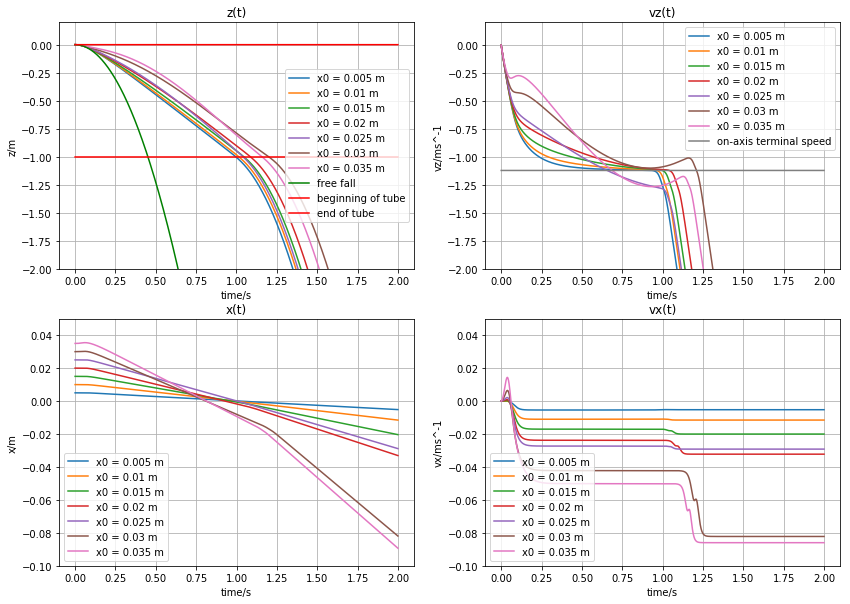

'    \ndef plot_qty(qty, title, x_axis, y_axis, lbl):\n    max_index = max_iter\n    plt.plot(T[:-1], qty[k, :-1])\n    plt.title(title)\n    plt.xlabel(x_axis)\n    plt.ylabel(y_axis)\n    plt.show()\n\nplot_qty(z, "Plot of z-coordinate against time", "t/s", "z/m")\nplot_qty(vz, "Plot of velocity along z-coordinate against time", "t/s", "vz/ms^-1")\nplot_qty(x, "Plot of x-coordinate against time", "t/s", "x/m")\nplot_qty(vx, "Plot of velocity along x-coordinate against time", "t/s", "vx/ms^-1")\n'

In [5]:
# plot data related to simulations with variying initial x-displacements


quantities = ["x", "vx", "z", "vz"]
init_displs = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035])



# read physical (and simulation) parameters from "info" file created for each simulation
g = 9.81
H = 1  

seed = 1
N = 200
max_iter = 2000
t_max = 2
T = np.linspace(0, t_max, max_iter)


# initiate arrays
#x, vx, z, vz = (np.zeros((len(init_displs), max_iter)), ) * 4
x = np.zeros((len(init_displs), max_iter))
vx = np.zeros((len(init_displs), max_iter))
z = np.zeros((len(init_displs), max_iter))
vz = np.zeros((len(init_displs), max_iter))

for k, x0 in enumerate(init_displs):
    
    # recreate the name of the (k-th) folder which contains all quantities for (k-th) simulation characterised by particular x0
    parent_folder = "python_arrays_offaxis/{}_N{}_iter{}_t{}_x{}".format(seed, N, max_iter, t_max, x0)
    # for this (k-th) folder, create a list of filenames - each file stores specific quantity, e.g. vz
    files = np.array([parent_folder + "/{}_{}_N{}_iter{}_t{}_x{}".format(seed, qty, N, max_iter, t_max, x0) for qty in quantities])
    # load the data from these files into k-th rows of 2D arrays, one for each qty.  
    #x[k,:] = np.genfromtxt(files[0])
    #vx[k,:] = np.genfromtxt(files[1])
    #z[k,:] = np.genfromtxt(files[2])
    #vz[k,:] = np.genfromtxt(files[3])
    x[k,:], vx[k,:], z[k,:], vz[k,:] = (np.genfromtxt(file) for file in files)



plt.figure(figsize=(14,10))    

plt.subplot(2, 2, 1)
for k, x0 in enumerate(init_displs):
    plt.plot(T[:-1], z[k,:-1], label='x0 = '+str(x0)+" m")
plt.plot(T,-1/2*g*T**2,'g',label='free fall')
plt.plot(T, 0*np.ones(max_iter),'r', label='beginning of tube')
plt.plot(T, -H*np.ones(max_iter),'r', label='end of tube')
plt.legend()
plt.xlabel('time/s')
plt.ylabel('z/m')
plt.ylim(-2, 0.2)
plt.title('z(t)')
plt.legend()
plt.grid()
#plt.show()

plt.subplot(2, 2, 2)
for k, x0 in enumerate(init_displs):
    plt.plot(T[:-1], vz[k,:-1], label='x0 = '+str(x0)+" m")
plt.plot(T[:-1], -1.12*np.ones(len(T[:-1])), label="on-axis terminal speed")
plt.xlabel('time/s')
plt.ylabel('vz/ms^-1')
plt.title('vz(t)')
plt.ylim(-2, 0.2)
plt.legend()
plt.grid()
#plt.show()

plt.subplot(2, 2, 3)
for k, x0 in enumerate(init_displs):
    plt.plot(T[:-1], x[k,:-1], label='x0 = '+str(x0)+" m")
plt.xlabel('time/s')
plt.ylabel('x/m')
plt.ylim(-0.1, 0.05)
plt.title('x(t)')
plt.legend()
plt.grid()
#plt.show()

plt.subplot(2, 2, 4)
for k, x0 in enumerate(init_displs):
    plt.plot(T[:-1], vx[k,:-1], label='x0 = '+str(x0)+" m")
plt.xlabel('time/s')
plt.ylabel('vx/ms^-1')
plt.ylim(-0.1, 0.05)
plt.title('vx(t)')
plt.legend()
plt.grid()
#plt.show()  
    
plt.show()    
    
    
    
"""    
def plot_qty(qty, title, x_axis, y_axis, lbl):
    max_index = max_iter
    plt.plot(T[:-1], qty[k, :-1])
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

plot_qty(z, "Plot of z-coordinate against time", "t/s", "z/m")
plot_qty(vz, "Plot of velocity along z-coordinate against time", "t/s", "vz/ms^-1")
plot_qty(x, "Plot of x-coordinate against time", "t/s", "x/m")
plot_qty(vx, "Plot of velocity along x-coordinate against time", "t/s", "vx/ms^-1")
"""

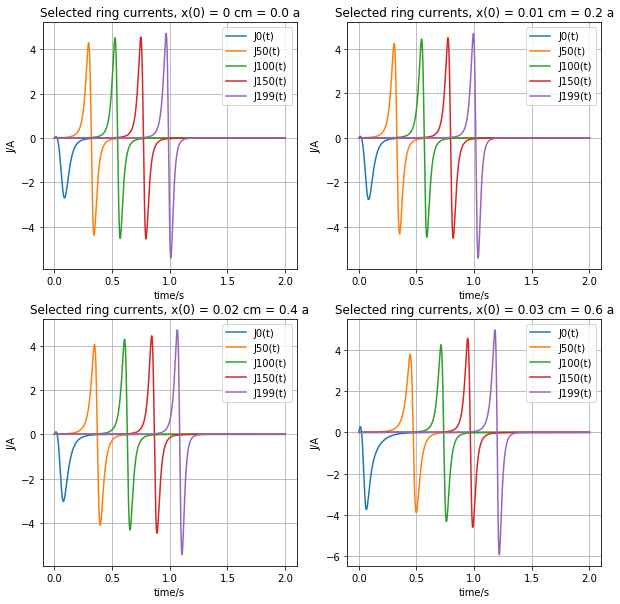

In [13]:
# plot currents

a = 0.05

plt.figure(figsize=(10,10))
selected_x0s =[0, 0.01, 0.02, 0.03]

for j,x0 in enumerate(selected_x0s):

    parent_folder = "python_arrays_offaxis/{}_N{}_iter{}_t{}_x{}".format(seed, N, max_iter, t_max, x0)
    file = parent_folder + "/{}_J_N{}_iter{}_t{}_x{}".format(seed, N, max_iter, t_max, x0)
    J = np.genfromtxt(file)                  
    
    plt.subplot(2,2,j+1)
    
    for k in [0, N//4, N//2, 3*N//4, N-1]:
        plt.plot(T, J[:,k], label='J'+str(k)+'(t)')
    plt.xlabel('time/s')
    plt.ylabel('J/A')
    plt.legend()
    plt.title('Selected ring currents, x(0) = '+str(x0)+' cm = '+str(round(x0/a,1))+' a')
    plt.grid()
    #plt.show()

plt.show()

[ 1.  1.  1.  1.  1.] [ 1.  1.  1.  1.  1.] [ 1.  1.  1.  1.  1.]


TypeError: data type not understood